# Lab 2: Linear regression

In this lab we will get more comfortable setting up linear regression and mixed-effects models in r.

## Goals of the lab:
* Learn to use the _lm_ function
* Learn to use the _predict_ function
* Learn to use the _lmer_ function

This lab draws from the practice sets at the end of Chapter 3 in James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r." and Chapter 1 in Bates, D., Maechler, M., Bolker, B., & Walker, S. (2014). "lme4: Linear mixed-effects models using Eigen and S4. R package version:, 1(7), 1-23.





--- 
# Simple linear regression with a single predictor

<br>
Here we will look at a simple case, where $X$ has only one predictor (i.e., p = 1). For these first examples we will be playing with the [_MASS_](https://cran.r-project.org/web/packages/MASS/MASS.pdf) and [_ISLR_](https://cran.r-project.org/web/packages/ISLR/index.html) libraries. 

In [4]:
# If you haven't already installed the ISLR package do so now (by uncommenting the line)
# install.packages("ISLR")

# Put the libaries in your 
library(MASS)
library(ISLR)

Let's start by playing around wiht some simple linear regression models from the _MASS_ library. In particular let's use the Boston data set, which records median house value (_medv_) for 506 neighborhoods around Boston. We will want to see how other factors actaully predict median housing prices.

If you want to visualize the data set first, use the _fix()_ function like so. (Note: this won't work in the Jupyter notebook environment, but will work in RStudio).

In [ ]:
fix(Boston)

Let's take a look at all the variables in the _Boston_ data set

In [8]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

You can also also take a look at the description for this data set using the _help()_ function. This will pop up a separate window that will give you the relevant information about any data set, libarary, or function in r.

In [ ]:
help(Boston)

We already went over this dataset in Lecture 9. The variables are

* **crim:** per capita crime rate by town.

* **zn:** proportion of residential land zoned for lots over 25,000 sq.ft.

* **indus:** proportion of non-retail business acres per town.

* **chas:**  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* **nox:** nitrogen oxides concentration (parts per 10 million).

* **rm:**  average number of rooms per dwelling.

* **age:** proportion of owner-occupied units built prior to 1940.

* **dis:**  weighted mean of distances to five Boston employment centres.

* **rad:**  index of accessibility to radial highways.

* **tax:** full-value property-tax rate per \$10,000.

* **ptratio:** pupil-teacher ratio by town.

* **black:** 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* **lstat:** lower status of the population (percent).

* **medv:** median value of owner-occupied homes in \$1000s.

<br>
This data is sampled from 506 neighborhoods (i.e., n=506). Thus the full model that predicts median house value has 13 predictor variable (i.e., p=13).

## Model fitting

Now we want to use the built in _lm_ function in r. We already went over this a little bit in the "Model Objects in R" recitation tutorial. But let's get mroe indepth here. 

In [ ]:
# To get more information on the lm function execute this cell
help(lm)

Okay, so now let's do some basic analysis. First we want to attach the variables from the _Boston_ data set into our workspace.

In [9]:
# Making variables accessible in the workspace
attach(Boston)

Let's use the built in function to look at the relationship between poverty (_lstat_) and median house value (_medv_). (**Note:** we could use ggplot2, but the built in functions are easy enough for data exploration)

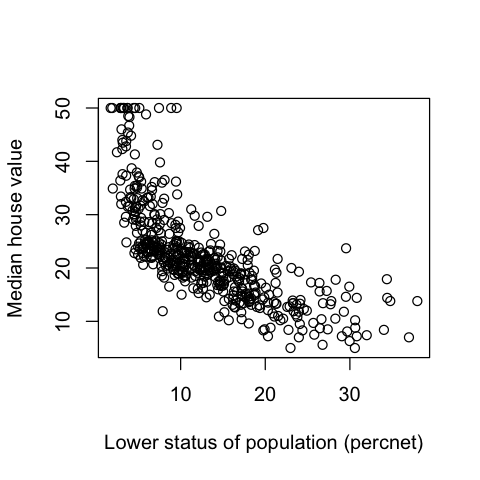

In [13]:
# Plot the joint distribution
options(repr.plot.width=4, repr.plot.height=4)
plot(lstat, medv, xlab="Lower status of population (percnet)", ylab="Median house value")

Now let's build a model object using _lm_ that captures this simple relationship. Remember that the output from the _lm_ function is an object that contains all the information about the model that you learned.

In [15]:
# Let's try a simple linear model
lm.fit = lm(medv~lstat)

# In order to see the results, use the summary function
summary(lm.fit)



Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


## Inference

The coefficients table tells us that we the effect of _lstat_ on _medv_ is statistically significant. We can extract these values alone using the _coef_ function to just extract the learned regression coefficients.

In [16]:
# Just grab the regression coefficients themselves
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

We can also estimate the confidence intervals on the coefficients from the model using the _confint_ function.

In [17]:
# In order to estimate the confidence interval on the 
# regression coefficients we will use confit
# help("confint") # Uncomment to see information on this function
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


Does the 95% confidence interval on _lstat_ contain zero? Do you accept or reject the null that local SES level associates with median house value?

## Prediction

Along with infering the effect of _lstat_ on _medv_ we can also look at using the model to predict house value. For this we will use the _predict_ function.

In [22]:
# We want to predict house value at specific lstat levels
# help("predict") # Uncomment to see how the function works

# Here we will predict what your house value will be if 
# the lstat for the neighborhood is 5, 10, or 15 percent.
predict(lm.fit, data.frame(lstat=c(5,10,15)), interval="confidence")


,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


What we get back are the predicted _medv_ values for each of the three _lstat_ values, along with the lower (_lwr_) and upper (_upr_) bounds of the 95% confidence interval of those predictions (i.e., we are 95% confident that the real value rests between those two bounds). For example, when _lstat_=10, we are 95% confident that your house value will be between \$24.47k and \$25.64k.

<br>
## Plotting

So far in this lab we have:

1. Learned a model.
2. Inferred the effect ($\hat{\beta}$) of a predictor (_lstat_) on a response variable (_medv_).
3. Generated predictions of those models.

Now let's learn some tools for visualizing the effectsl

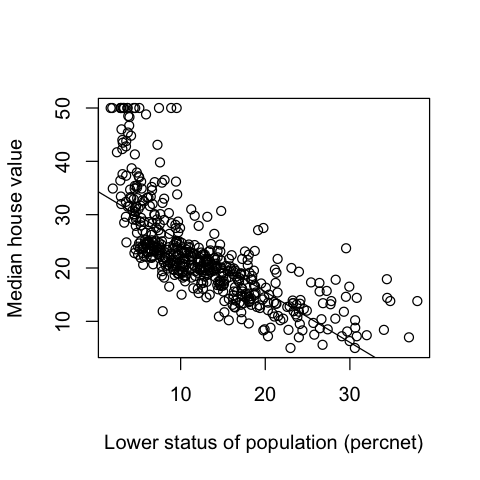

In [23]:
#Let's plot the regression line against the data
plot(lstat, medv,xlab="Lower status of population (percent)", ylab="Median house value")
# help("abline") # Uncomment to see how the function works
abline(lm.fit)

If you want a comprehensive visualization of the model, you can apply the plot command to the _lm.fit_ model object. 

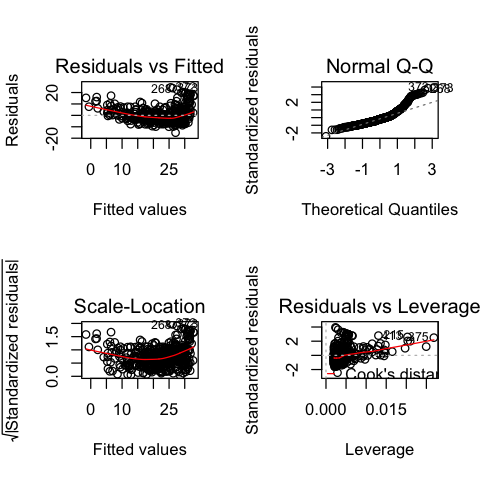

In [24]:
# Setup a 2x2 plot
par(mfrow=c(2,2))

# Plot the full model evaluations
plot(lm.fit)

Notice we get four plots that reveal different aspects of the model.

1. **Residuals vs. Fitted values:** We are looking for a generally flat line here, which would indicate a strictly linear data set.

2. **Q-Q Plot:** This is on the residuals and is used to validate your assumption that $Y$ is normally distributed. Note that the residuals are normalized to be standard normal (i.e., z-score transformed).

3. **Scale-location:** This is similar to the first plot, but the residuals are rescaled to be positive. This helps you to see if any non-linearities in the model are driven by tails in the residual distribution.

4. **Residuals vs. Leverage:** Here we apply the leverage statistic to see if there are any high-leverage values that are driving the model fits. Remember, you want to look for clusters of extreme points in the x-dimension here.

If you want to explore these values in more detail, I suggest getting comfortable with the _residuals_, _rstudent_, and _hatvalues_ functions.

---
# Regression with multiple predictors

<br>
In the example above we fit a model where p = 1. 

$$ Y_{medv} = \hat{\beta_0} + \hat{\beta_1}X_{lstat} + \epsilon $$

Now let us explore the case where p > 1.

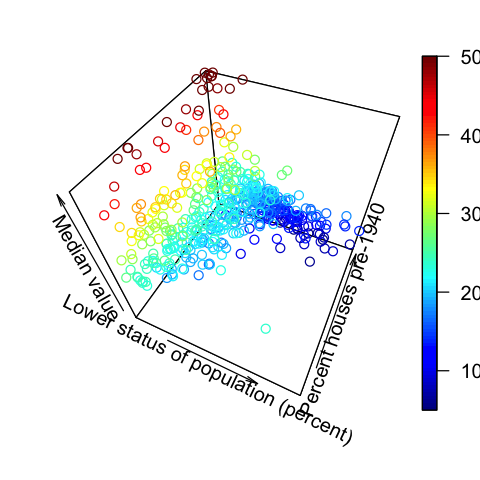

In [27]:
# Let's plot some relationships first.
#install.packages("plot3D") # Uncomment if this is not installed

# Let's look at the relationship between average house age and 
# neighborhood SES on house value
plot3D::scatter3D(lstat, age, medv, phi=50, theta=25, xlab="Lower status of population (percent)", ylab="Percent houses pre-1940",zlab="Median value")


Interpeting the 3 dimensional scatterplot is the same as interpreting the 2 dimensional plot we showed above. You want a "football" shaped clustering where changes in _medv_ follow changes in the other two variables.

So it's clear that adding _age_ seems to also explain _medv_. We can confirm this by adding _age_ as a factor to our model

In [28]:
# Now let's try to quantify it
lm.fit = lm(medv~lstat+age)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


Notice that our model fit statistics ($r^2$, F-statistic, RSE) all improve when we add _age_, but we now know why that is.

Let's say we wanted to estimate the _full model_ (i.e., use all the variables in the Boston data set to predict _medv_). If you use the "." symbol in the _lm_ function call, it tells r to use all variables _but_ the one being predicted.

In [29]:
# Remember you'll want to specify the data frame if you call it this way
lm.fit=lm(medv~., data=Boston)
summary(lm.fit)



Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

We already look at this full model in an earlier lecture. So we don't need to go into detail interpreting it. 

Instead let's just keep playing with the ways that you can run and query the model object. First, let's say you want to exclude the non-significant variables from the model. According to the coefficients table above, _indus_ and _age_ are not significant predictors when we run the full model. So we can remove them in two ways. First we can just learn a new model with these variables excluded.

In [32]:
# Excluding a variable from the model: age, indus
lm.fit_new = lm(medv~.-age -indus, data=Boston)
summary(lm.fit_new)


Call:
lm(formula = medv ~ . - age - indus, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.736 on 494 d

Alternatively we can just update the _lm.fit_ model that we learned above by extracting those variables using the _update_ function.

In [34]:
# Or just update the existing model
lm.fit_new=update(lm.fit, ~.-age -indus)
summary(lm.fit_new)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

Either way it's pretty easy to swap terms in and out of the model in r.

---
# Nonlinear predictors

<br>

Remember from Lecture 10, you can model non-straight lines by changing the scale of the predictor variables. In order to execute this in r, you will need to use the _I_ function (which stands for _inhibit interpretation_), so that you can execute a transformation of a variable within a function.


In [37]:
# We will use the I() function (Inhibit Interpretation) 
# to square the x variable
lm.fit = lm(medv~lstat)
lm.fit2 = lm(medv~lstat+I(lstat^2))

# The smaller p-value suggests that the model fit improves
# when we square lstat.

# Let's quantify which has a better fit using an F-test
anova(lm.fit, lm.fit2)


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


The first row compares the intercepts (which should be the same) and the second row compares the regression coefficients for lstat effects. Because the ANOVA is significant, it means that introducing the $X_{lstat}^2$ term in the model substantially improves the model fits.

---
# Working with categorical (qualitative) predictors

<br>
So far we've been playing mostly with quantitative predictors. Let's now play with some qualitative predictors.

For this we will use a different data set (the [CAR](https://cran.r-project.org/web/packages/car/car.pdf) package).

In [39]:
# First we will want to clear the workspace
rm(list=ls())

# Next load the car package for this
#install.packages("car") #Uncomment if you haven't already installed the package

# Look at the Carseats dataset
# help(Carseats) # Uncomment to view documentation
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

This data set consists of a data frame with 400 observations on the following 11 variables.

* **Sales:**  Unit sales (in thousands) at each location

* **CompPrice:** Price charged by competitor at each location

* **Income:**  Community income level (in thousands of dollars)

* **Advertising:** Local advertising budget for company at each location (in thousands of dollars)

* **Population:** Population size in region (in thousands)

* **Price:**  Price company charges for car seats at each site

* **ShelveLoc:** A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

* **Age:** Average age of the local population

* **Education:** Education level at each location

* **Urban:**  A factor with levels No and Yes to indicate whether the store is in an urban or rural location

* **US:** A factor with levels No and Yes to indicate whether the store is in the US or not


Let's just model this first, but we will want to pay special attention to the _ShelveLoc_ variable.

In [40]:
# Now let us fit Sales with some interaction terms
lm.fit = lm(Sales~.+Income:Advertising+Price:Age, data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

Let's look closer at the _ShelveLoc_ variable. Notice that the original variable had 3 levels. But r automatically recoded this into 2 binary variables: _ShelveLocGood_ and _ShelveLocMedium_.

You can see how r sets up this binarization using the _contrasts_ function.

In [41]:
attach(Carseats)
contrasts(ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


Thus the effect for Bad shelving locations is included in the intercept term of the model. In this model, _ShelveLoc_ is the only categorical variable that has more than 2 levels. However, things get complicated if you have multiple categorical variables that have more than two terms. So watch carefully how r redefines these variable.

---
# Linear mixed-effects models

<br>
Now let's change gears and see how we can use the linear mixed-effects tools in r. For this we will need to install the [_lme4_](https://cran.r-project.org/web/packages/lme4/lme4.pdf) library in r. 

In [57]:
# Clear the workspace again
rm(list=ls())

# Install LME4
#install.packages("lme4") # Uncomment if not installed.
library(lme4)

This library includes a sleep study experiment that we can use to practice fitting a mixed-effect model.

In [47]:
#help(sleepstudy) # Uncomment to see documentation
names(sleepstudy)

[1] "Reaction" "Days"     "Subject"

Summary: "The average reaction time per day for subjects in a sleep deprivation study. On day 0 the subjects had their normal amount of sleep. Starting that night they were restricted to 3 hours of sleep per night. The observations represent the average reaction time on a series of tests given each day to each subject."

Thus we have a data frame with 180 observations on the following 3 variables.

* **Reaction:** Average reaction time (ms)

* **Days:** Number of days of sleep deprivation

* **Subject:**  Subject number on which the observation was made.

The main question we have here is whether days of consecutive sleep deprivation impact reaction times.  This boils down to a repeated measures problem: the same subjects are tested across multiple days, so random effects associated with each individual will also carry over across days, violating the assumption that each observation is independent and identically distributed (i.e., _iid_).



The following objects are masked from sleepstudy (pos = 3):

    Days, Reaction, Subject



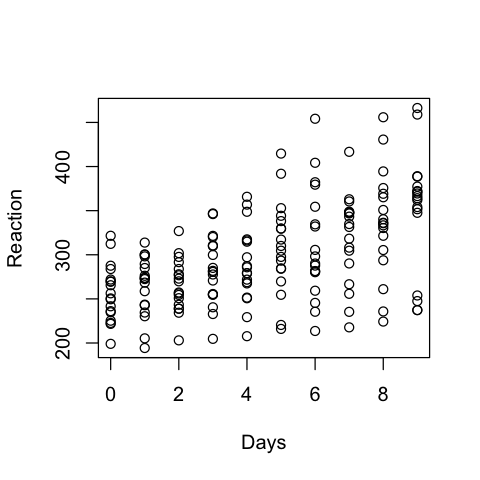

In [50]:
# Let's take a look at the fixed effects
attach(sleepstudy)
plot(Days, Reaction) 

In [52]:
# First let's try the simple linear fit (aka- the Fixed effect)
fe.fit = lm(Reaction~Days)
summary(fe.fit)


Call:
lm(formula = Reaction ~ Days)

Residuals:
     Min       1Q   Median       3Q      Max 
-110.848  -27.483    1.546   26.142  139.953 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  251.405      6.610  38.033  < 2e-16 ***
Days          10.467      1.238   8.454 9.89e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.71 on 178 degrees of freedom
Multiple R-squared:  0.2865,	Adjusted R-squared:  0.2825 
F-statistic: 71.46 on 1 and 178 DF,  p-value: 9.894e-15


Notice that we are still getting a significant effect of days of sleep deprivation on reaction time, even if we ignore the fact that the same subjects are sampled across all days.

In order to account for those subject effects, let's treat them as a random effect. In this case we will assume that the effect of sleep deprivation on reaction times varies by subject. 

In _lmer_, random-effects terms are distinguished by vertical bars (|) separating expressions for design matrices from grouping factors. 

In [55]:
# Now let's account for the random impact of subject variance on the model
me.fit = lmer(Reaction ~ Days + (Days | Subject))
summary(me.fit)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (Days | Subject)

REML criterion at convergence: 1743.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9536 -0.4634  0.0231  0.4634  5.1793 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 Subject  (Intercept) 612.09   24.740       
          Days         35.07    5.922   0.07
 Residual             654.94   25.592       
Number of obs: 180, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  251.405      6.825   36.84
Days          10.467      1.546    6.77

Correlation of Fixed Effects:
     (Intr)
Days -0.138

If we look at the t-value for Days on Reaction in the Fixed effects, it has dropped to 6.77 (from 8.45 in the simple linear model). Thus we are getting a more conservative model fit on the fixed effects.

Notice that the report on the random effects doesn't provide an inferential statistic (i.e., a p-value). That is because interpreting the magnitude of the random effect is meaningless because it is, by definition, random.

Therefore, to interpret the value of including the random effects term in your model, you will want to do a model comparison instead. Specifically does the mixed-effect model provide a better fit to the data than the simple linear regression model. Notice that they have different model complexities, so you'll have to use an evaluation criterion that takes complexity into account (e.g., AIC).

In [56]:
# We will compare the two models using the Akaike information criterion (AIC)
ic = AIC(fe.fit, me.fit)
ic
diff(ic$AIC)

,df,AIC
fe.fit,3,1906.293
me.fit,6,1755.628


[1] -150.6648

This difference in AIC is quite big, which means that the more complex model (the mixed-effects model) accounts for substantially more variance in reaction time than the simple linear model, even after accounting for its increased complexity. 